In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', 500)

In [2]:
original_df = pd.read_csv('./data/clean_listings.csv', sep=';', index_col=0)

/Users/javi/miniconda3/envs/upf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
original_df=original_df.reset_index(drop=True)

In [4]:
original_df.head()

,id,host_id,host_since,host_location,host_is_superhost,host_listings_count,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_value,license,calculated_host_listings_count,reviews_per_month,date,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,number_of_reviews_l30d
0,562020,368317,2011-01-30,"Barcelona, Cataluña, Spain",f,4.0,4.0,"Calle de San Vicente, Barcelona, Catalonia 080...",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,08001,ES,Spain,41.382399,2.165417,t,Apartment,Entire home/apt,4,1.0,1.0,3.0,Real Bed,"{TV,""Air Conditioning"",Kitchen,""Smoking Allowe...",NaN,$85.00,$750.00,"$1,400.00",$150.00,$40.00,2.0,$20.00,1,1125,1,2014-08-09,2014-08-09,80.0,NaN,NaN,NaN,NaN,3,0.08,2015-09-03,NaN,NaN,NaN,NaN,NaN
1,2032686,7967999,2013-08-06,"Barcelona, Catalonia, Spain",f,5.0,5.0,"Carrer de les Penedides, Barcelona, Catalonia ...",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,08001,ES,Spain,41.378740,2.172947,t,Bed & Breakfast,Private room,1,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Smok...",NaN,$25.00,NaN,NaN,NaN,$20.00,1.0,$10.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2015-09-03,NaN,NaN,NaN,NaN,NaN
2,6690801,35019755,2015-06-04,US,f,2.0,2.0,"Carrer de Sant Pau, Barcelona, Catalunya 08001...",El Raval,el Raval,Ciutat Vella,Barcelona,Catalunya,08001,ES,Spain,41.380031,2.172098,t,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Smoking...",NaN,$63.00,NaN,NaN,NaN,NaN,1.0,$0.00,1,1125,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2015-09-03,NaN,NaN,NaN,NaN,NaN
3,448881,1267680,2011-10-09,"Barcelona, Cataluña, Spain",f,6.0,6.0,"Carrer del Carme, Barcelona, Catalonia 08001, ...",El Raval,el Raval,Ciutat Vella,Barcelona,Catalonia,08001,ES,Spain,41.383023,2.169421,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$62.00,$450.00,"$1,600.00",$350.00,NaN,2.0,$5.00,30,1125,6,2012-06-10,2015-03-08,96.0,9.0,9.0,9.0,NaN,4,0.15,2015-09-03,NaN,NaN,NaN,NaN,NaN
4,7211162,24078958,2014-11-23,FR,f,1.0,1.0,"Barcelona, Catalonia 08001, Spain",NaN,el Raval,Ciutat Vella,Barcelona,Catalonia,08001,ES,Spain,41.375246,2.168845,f,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",NaN,$30.00,$200.00,$450.00,NaN,$20.00,1.0,$10.00,5,1125,1,2015-08-14,2015-08-14,100.0,10.0,10.0,10.0,NaN,1,1.00,2015-09-03,NaN,NaN,NaN,NaN,NaN


# Limpiar datos

In [5]:
# Columns to be dropped
to_drop = ['host_id', 'reviews_per_month', 'country', 'weekly_price', 'bed_type',
       'monthly_price', 'calculated_host_listings_count_entire_homes', 'number_of_reviews_l30d',
        'number_of_reviews_ltm', 'neighbourhood_cleansed',  'neighbourhood', 'country_code',
       'calculated_host_listings_count_entire_homes', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes'
       'number_of_reviews_l30d', 'calculated_host_listings_count', 'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness', 'zipcode',
       'review_scores_value', 'latitude', 'longitude', 'is_location_exact', 'city', 'state', 'host_listings_count', 'host_total_listings_count', 'street', 'host_location']

In [6]:
df = original_df.drop(columns=to_drop, errors='ignore')

In [7]:
df.columns

Index(['id', 'host_since', 'host_is_superhost', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'square_feet', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'license', 'date'],
      dtype='object')

In [8]:
# Cambiar formato fechas
def split_dates(date):
    if str(date)!='nan':
        return date.split('-')
    return [None, None, None]

In [9]:
df['host_since_year'], df['host_since_month'], df['host_since_day'] = zip(*df.host_since.apply(split_dates))

In [10]:
df['date_year'], df['date_month'], df['date_day'] = zip(*df.date.apply(split_dates))

In [11]:
df.head()

,id,host_since,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,license,date,host_since_year,host_since_month,host_since_day,date_year,date_month,date_day
0,562020,2011-01-30,f,Ciutat Vella,Apartment,Entire home/apt,4,1.0,1.0,3.0,"{TV,""Air Conditioning"",Kitchen,""Smoking Allowe...",NaN,$85.00,$150.00,$40.00,2.0,$20.00,1,1125,NaN,2015-09-03,2011,01,30,2015,09,03
1,2032686,2013-08-06,f,Ciutat Vella,Bed & Breakfast,Private room,1,1.0,1.0,2.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Smok...",NaN,$25.00,NaN,$20.00,1.0,$10.00,1,1125,NaN,2015-09-03,2013,08,06,2015,09,03
2,6690801,2015-06-04,f,Ciutat Vella,Apartment,Private room,2,2.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Smoking...",NaN,$63.00,NaN,NaN,1.0,$0.00,1,1125,NaN,2015-09-03,2015,06,04,2015,09,03
3,448881,2011-10-09,f,Ciutat Vella,Apartment,Entire home/apt,4,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$62.00,$350.00,NaN,2.0,$5.00,30,1125,NaN,2015-09-03,2011,10,09,2015,09,03
4,7211162,2014-11-23,f,Ciutat Vella,Apartment,Private room,2,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Kitchen,""Pets li...",NaN,$30.00,NaN,$20.00,1.0,$10.00,5,1125,NaN,2015-09-03,2014,11,23,2015,09,03


In [12]:
df.drop(columns=['date_day', 'host_since', 'date'], inplace=True)

# Data exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944531 entries, 0 to 944530
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id                            944531 non-null  int64  
 1   host_is_superhost             942895 non-null  object 
 2   neighbourhood_group_cleansed  944531 non-null  object 
 3   property_type                 944528 non-null  object 
 4   room_type                     944531 non-null  object 
 5   accommodates                  944531 non-null  int64  
 6   bathrooms                     902064 non-null  float64
 7   bedrooms                      942385 non-null  float64
 8   beds                          940114 non-null  float64
 9   amenities                     932498 non-null  object 
 10  square_feet                   32077 non-null   float64
 11  price                         944531 non-null  object 
 12  security_deposit              553293 non-nul

There are columns that don't have a correct type. The most important one is the price. I will transform the variables and then can back to the analysis.

In [14]:
numerics = ['int64', 'float64']
numeric_columns = df.select_dtypes(include=numerics).columns

In [15]:
numeric_columns = [col for col in numeric_columns if col!='id']
numeric_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'guests_included',
 'minimum_nights',
 'maximum_nights']

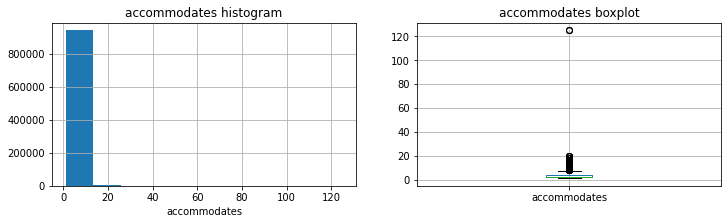

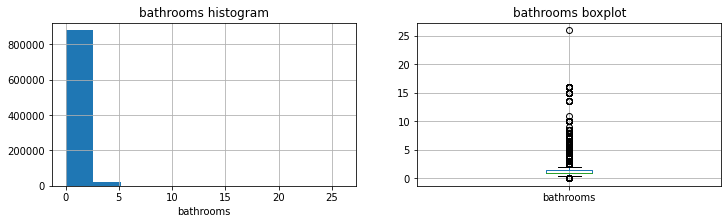

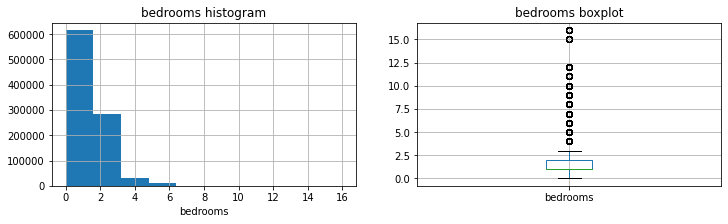

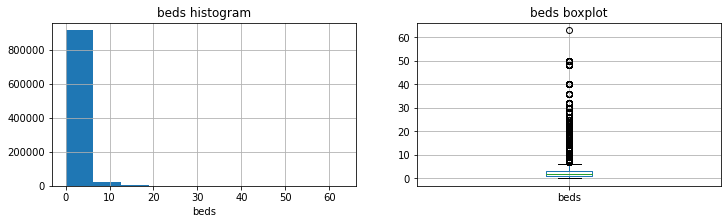

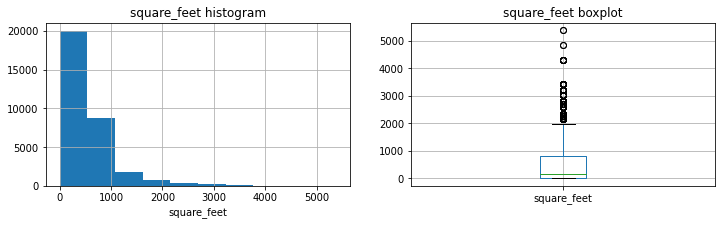

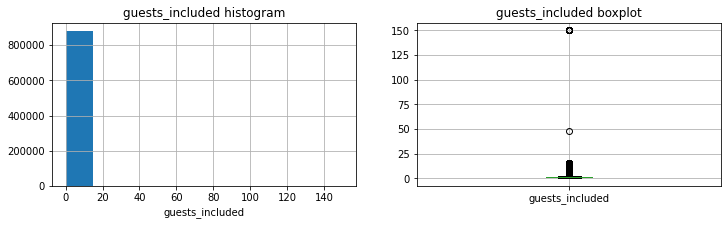

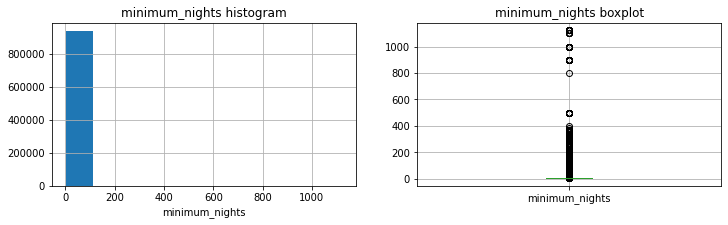

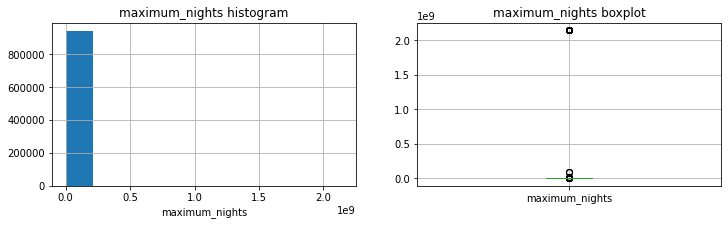

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, to_plot):
    """
    Plots histogram and boxplot for a variable.
    """
    f, axes = plt.subplots(1, 2, figsize=(12,3))
    
    # Plot histogram
    plt1 = df[to_plot].hist(ax=axes[0])
    plt1.set_title("{0} histogram".format(to_plot))
    plt1.set_xlabel(to_plot)
    
    # Plot boxplot
    plt2 = df.boxplot(column=[to_plot], ax=axes[1])
    plt2.set_title("{0} boxplot".format(to_plot))
    
    plt.show()

for to_plot in numeric_columns:
    plot_distributions(df, to_plot)

# Data transformation

#### License
We want our license to be a boolean value (license or no-license).

In [17]:
df.license.unique()

array([nan, 'HUTB-003247', 'HUTB-002693', ..., 'HUTB-032009- 09',
       'HUTB017122', 'HUTB-032007-03'], dtype=object)

In [18]:
df['license'] = df['license'].apply(lambda x: 1 if str(x)!='nan' else 0)

#### Host is superhost
We will transform the values t, f by a boolean value.

In [19]:
df['host_is_superhost'] = df['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)

#### Apartment types
Our dataset has many types of apartment types. Are all of them relevant or we can simplify this variable? I decided to keep the most common values and set the rest of them as 'other'. Also, `apartment` and `Entire apartment` will be unified into one value because they will be distinguished by the `room type` value.

In [20]:
# Print the 30 most popular types of apartments
apartment_count = df.property_type.value_counts()
print(apartment_count[:30])

Apartment                             779055
House                                  21938
Loft                                   19511
Serviced apartment                     17551
Private room in apartment              17521
Entire apartment                       16901
Condominium                            16414
Bed & Breakfast                         8388
Guest suite                             7132
Other                                   6315
Bed and breakfast                       5776
Hostel                                  4975
Boutique hotel                          3562
Boat                                    2427
Guesthouse                              2026
Hotel                                   1517
Dorm                                    1199
Townhouse                               1152
Aparthotel                               847
Villa                                    797
Casa particular (Cuba)                   696
Private room in house                    689
Entire lof

In [21]:
# By default all will be set to Other
apartment_types = df.property_type.unique()
apartment_map = {}
for a in apartment_types:
    apartment_map[a] = 'Other'

In [22]:
# Replace the most common and relevant by a value
apartment_map['Apartment'] = 'Apartment'
apartment_map['Bed & Breakfast'] = 'B&B'
apartment_map['House'] = 'House'
apartment_map['Loft'] = 'Loft'
apartment_map['Serviced apartment'] = 'Serviced apartment'
apartment_map['Private room in apartment'] = 'Private room in apartment'
apartment_map['Entire apartment'] = 'Apartment'
apartment_map['Condominium'] = 'Condominium'
apartment_map['Bed and breakfast'] = 'B&B'
apartment_map['Boat'] = 'Boat'

In [23]:
# Maps the values in the dataframe
df['property_type'] = df.property_type.replace(apartment_map)

#### Maximum and minimum nights
These values determine the minimum and maximum number of nights. If we analyze, we can basically distinguish two types of renting short-term and long-term. Therefore, the following transformations are performed:
* Maximum nights becomes a boolean value. 1 determines that you can stay long-term (more than a month), else will be set to 0
* Minimum nights also becomes a boolean value. 1 determines if you need to stay at least a week, 0 if you can stay shorter.

In [24]:
# 1 if you can stay more than a month, 0 else
df['maximum_nights'] = df['maximum_nights'].apply(lambda x: 1 if x>30 else 0)

# 1 fi you must stay at least a week 0 else
df['minimum_nights'] = df['minimum_nights'].apply(lambda x: 1 if x>7 else 0)

#### Fees
We will assume that listings with null value for the cleaning fee and security deposit, means that they are free. Also we will transform from text to a numeric value. 

In [25]:
df['security_deposit'] = df['security_deposit'].fillna(0)
df['cleaning_fee'] = df['cleaning_fee'].fillna(0)
df['extra_people'] = df['extra_people'].fillna(0)

In [26]:
def clean_money(money):
    """
    Transforms the string variable for money to a numeric variable.
    """
    if str(money) != 'nan':
        return float(str(money).replace('$', '').replace(',', ''))
    else:
        return None

In [27]:
df['security_deposit'] = df['security_deposit'].apply(clean_money)

In [28]:
df['cleaning_fee'] = df['cleaning_fee'].apply(clean_money)

In [29]:
df['extra_people'] = df['extra_people'].apply(clean_money)

#### Price
We need to transform it to a numeric variable

In [30]:
df['price'] = df['price'].apply(clean_money)

#### Guests
There are two important variables: `guests_included` and `accommodates`. The first one indicates how many guests are included in the price while the second shows how many people can stay in the apartment. Transformations:
* For those empty `guests_included`, I assume all guests are covered by the price.
* I fix the guests_included. For some listings, the guests_included are larger than the maximum number of people. After analyzing the data, I concluded that in those cases, `guests_included` should be ecual to `accommodates`.

In [31]:
df[df['guests_included']>df['accommodates']].head(50)

,id,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month
133,7557363,0,Ciutat Vella,Apartment,Private room,1,1.0,1.0,1.0,"{""Air Conditioning"",Kitchen,Breakfast,""Buzzer/...",NaN,22.0,0.0,10.0,2.0,0.0,0,1,0,2015,07,26,2015,09
227,571783,0,Ciutat Vella,Apartment,Entire home/apt,4,1.0,2.0,3.0,"{TV,""Wireless Internet"",Kitchen,""Pets Allowed""...",0.0,80.0,100.0,0.0,5.0,20.0,0,1,0,2012,07,03,2015,09
429,424137,0,Ciutat Vella,Apartment,Entire home/apt,6,1.0,2.0,3.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,110.0,150.0,30.0,7.0,25.0,0,1,1,2012,04,10,2015,09
434,1210446,0,Ciutat Vella,Apartment,Entire home/apt,3,1.0,1.0,1.0,"{TV,""Wireless Internet"",""Air Conditioning"",Kit...",NaN,79.0,0.0,0.0,4.0,0.0,0,1,0,2012,06,05,2015,09
558,3710170,0,Ciutat Vella,Apartment,Entire home/apt,6,1.0,3.0,3.0,"{Internet,""Wireless Internet"",Kitchen,""Smoking...",NaN,145.0,200.0,30.0,7.0,20.0,0,1,0,2014,07,22,2015,09
574,123746,0,Ciutat Vella,Apartment,Private room,1,1.0,1.0,1.0,"{Internet,""Wireless Internet"",Doorman,""Elevato...",NaN,30.0,0.0,0.0,2.0,30.0,0,0,0,2011,05,23,2015,09
752,1427662,0,Ciutat Vella,Apartment,Private room,2,1.5,1.0,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,30.0,0.0,0.0,3.0,0.0,0,0,0,2013,07,23,2015,09
1047,3253653,0,Ciutat Vella,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Smok...",NaN,69.0,150.0,30.0,3.0,0.0,0,1,0,2014,06,06,2015,09
1190,959880,0,Ciutat Vella,B&B,Private room,2,1.5,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",0.0,50.0,0.0,5.0,10.0,10.0,0,1,0,2013,02,25,2015,09
1332,1047252,0,Ciutat Vella,Apartment,Private room,2,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,45.0,100.0,0.0,3.0,0.0,0,0,0,2013,04,04,2015,09


We see that in most cases, we find an extra person in `guests_included` that could be representing children. In this cases, reducing to `accomodates` isn't a problem. We also find clear outliers (see row with index 1190) in which `guests_included` are way more than the maximum number of people that could fit in the apartment. In 1190, there are 2 beds and 10 guests included.

In [32]:
df['guests_included'] = df['guests_included'].fillna(df['accommodates'])

In [33]:
def fix_guests_included(row):
    if row['guests_included']>row['accommodates'] :
        return row['accommodates']
    else:
        return row['guests_included']

In [34]:
df['guests_included'] = df.apply(lambda x: fix_guests_included(x), axis=1)

I create a new variable which represents the non-included guests in the price

In [35]:
df['extra_guests'] = df['accommodates']-df['guests_included']

#### Compute total price for the accommodation
I generate a new variable encoding the total price of the listing computed as the price + the additional price for extra guests.

In [36]:
df['total_price'] = df['price'] + df['extra_guests']*df['extra_people']

#### Renaming
I change the variable names to better understand what they represent.

In [37]:
df = df.rename(columns={'price': 'min_price', 'guests_included': 'min_guests'})

#### Encoding amenities
Amenities are a list of services that the accommodation includes. I identified the most relevant and common ones that will be kept. They will be one-hot encoded.

In [38]:
amenities = df['amenities'].values
amenities_dist = []
for i in range(len(amenities)):
    if str(amenities[i]) != 'nan':
        amenities_dist+=str(amenities[i][1:-1]).replace('"', '').split(',')

In [39]:
from collections import Counter
amenities_dist = Counter(amenities_dist)

In [40]:
amenities_dist

Counter({'TV': 618898,
         'Air Conditioning': 27241,
         'Kitchen': 794765,
         'Smoking Allowed': 18414,
         'Buzzer/Wireless Intercom': 34241,
         'Family/Kid Friendly': 34250,
         'Suitable for Events': 4568,
         'Internet': 333897,
         'Wireless Internet': 329326,
         'Pets Allowed': 8907,
         'Breakfast': 76338,
         'Heating': 666739,
         'Washer': 686221,
         'Essentials': 807328,
         'Elevator in Building': 33817,
         'Cable TV': 105593,
         'Indoor Fireplace': 1029,
         'Pets live on this property': 48563,
         'Dog(s)': 15999,
         'Shampoo': 522256,
         '': 4399,
         'First Aid Kit': 11993,
         'Fire Extinguisher': 7131,
         'Dryer': 215390,
         'Wheelchair Accessible': 7358,
         'Safety Card': 4717,
         'Free Parking on Premises': 2294,
         'Cat(s)': 22079,
         'Doorman': 62250,
         'Hot Tub': 1521,
         'Smoke Detector': 3315,
 

I will select the amenities based on frequency and my understanding of being relevant for distinguishing accommodations. For instance, pool is not very common but might be really relevant. Also, some others like `elevator` and `elevator in building` must be unified.

In [41]:
selected_amenities = ['air conditioning', 
                      'balcony', 
                      'bath towel', 
                      'beach view', 
                      'breakfast', 
                      'cable tv', 
                      'tv', 
                      'elevator', 
                      'garden', 
                      'heating', 
                      'kitchen',
                      'pool',
                      'wifi',
                      'smoking allowed', 
                      'family/kid friendly',
                      'suitable for events', 
                      'internet', 
                      'essentials', 
                      'washer']

In [42]:
def clean_amenities(amenities):
    if str(amenities)!='nan' and len(amenities):
        amenities = amenities[1:-1] # Remove set signs
        amenities = amenities.replace('"', '').lower()
        # Replace values to be unified
        amenities = amenities.replace('wireless internet', 'internet')
        amenities = amenities.replace('free wifi', 'internet')
        amenities = amenities.replace('elevator in building', 'elevator')
        amenities = amenities.replace('cable tv', 'tv')
        amenities = amenities.replace('garden or backyard', 'garden')
        amenities = amenities.replace('washer / dryer', 'washer')
        amenities = amenities.replace('swimming pool', 'pool')
        amenities = amenities.split(',')
        return [i.strip() for i in amenities if i in selected_amenities]
    return None

In [43]:
df['amenities'] = df['amenities'].apply(clean_amenities)

In [44]:
# Check that new amenities are withing our desired selection
amenities = df['amenities'].values
amenities_set = set()
for i in range(len(amenities)):
    if amenities[i]:
        amenities_set = amenities_set.union(set(amenities[i]))

In [45]:
amenities_set

{'air conditioning',
 'balcony',
 'bath towel',
 'beach view',
 'breakfast',
 'elevator',
 'essentials',
 'family/kid friendly',
 'garden',
 'heating',
 'internet',
 'kitchen',
 'pool',
 'smoking allowed',
 'suitable for events',
 'tv',
 'washer',
 'wifi'}

In [46]:
df.reset_index(drop=True, inplace=True)

In [47]:
# One hot encode these amenities
df = df.assign(**pd.get_dummies(df.amenities.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).max(level=0))

<ipython-input-47-3a1197fcd492>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df.assign(**pd.get_dummies(df.amenities.apply(lambda x:pd.Series(x)).stack().reset_index(level=1,drop=True)).max(level=0))


In [48]:
df.drop(columns=['amenities'], inplace=True)

In [49]:
# Checkpoint
#df.to_csv('df_checkpoint1.csv')
#df = pd.read_csv('df_checkpoint1.csv', index_col=0)

In [50]:
df.head()

,id,host_is_superhost,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,square_feet,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi
0,562020,0,Ciutat Vella,Apartment,Entire home/apt,4,1.0,1.0,3.0,NaN,85.0,150.0,40.0,2.0,20.0,0,1,0,2011,01,30,2015,09,2.0,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,2032686,0,Ciutat Vella,B&B,Private room,1,1.0,1.0,2.0,NaN,25.0,0.0,20.0,1.0,10.0,0,1,0,2013,08,06,2015,09,0.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,6690801,0,Ciutat Vella,Apartment,Private room,2,2.0,1.0,1.0,NaN,63.0,0.0,0.0,1.0,0.0,0,1,0,2015,06,04,2015,09,1.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,448881,0,Ciutat Vella,Apartment,Entire home/apt,4,1.0,1.0,2.0,NaN,62.0,350.0,0.0,2.0,5.0,1,1,0,2011,10,09,2015,09,2.0,72.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,7211162,0,Ciutat Vella,Apartment,Private room,2,1.0,1.0,1.0,NaN,30.0,0.0,20.0,1.0,10.0,0,1,0,2014,11,23,2015,09,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
df.shape

(944531, 43)

#### Neighbourhoods
We must one-hot encode our neighbourhoods.

In [52]:
def one_hot_encode(df, column):
    """
    Applies one hot encoding in df for a given column
    """
    # Reset index for merge
    df = df.reset_index(drop=True)
    # Get one hot encoding of columns B
    one_hot = pd.get_dummies(df[column])
    # Drop column B as it is now encoded
    df = df.drop(column, axis = 1)
    
    return df.join(one_hot)

In [53]:
# Set undefined neighbourhood for missing data (there are no missing neighborhoods in this dataset)
df['neighbourhood_group_cleansed'].fillna('Other', inplace=True)
df['neighbourhood_group_cleansed'].unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Sant Martí',
       'Les Corts', 'Horta-Guinardó', 'Sarrià-Sant Gervasi', 'Gràcia',
       'Nou Barris', 'Sant Andreu'], dtype=object)

In [54]:
df = one_hot_encode(df, 'neighbourhood_group_cleansed')

#### Room types
We will also one-hot encode these values. To avoid confusion, I specify that private room means that you will be in a shared building/apartment.

In [55]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [56]:
df = one_hot_encode(df, 'room_type')

In [57]:
df = df.rename(columns={'Private room': 'Private room in shared building'})

#### Property types
Now, we will one-hot encode the previously defined property types.

In [58]:
df.property_type.value_counts()

Apartment                    795956
Other                         39049
House                         21938
Loft                          19511
Serviced apartment            17551
Private room in apartment     17521
Condominium                   16414
B&B                           14164
Boat                           2427
Name: property_type, dtype: int64

In [59]:
df = one_hot_encode(df, 'property_type')

# Variables analysis revisited
Now that we have transformed our data, we will analyze our variables for the training process and spot further improvements.

In [60]:
df.head()

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,square_feet,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
0,562020,0,4,1.0,1.0,3.0,NaN,85.0,150.0,40.0,2.0,20.0,0,1,0,2011,01,30,2015,09,2.0,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,2032686,0,1,1.0,1.0,2.0,NaN,25.0,0.0,20.0,1.0,10.0,0,1,0,2013,08,06,2015,09,0.0,25.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,6690801,0,2,2.0,1.0,1.0,NaN,63.0,0.0,0.0,1.0,0.0,0,1,0,2015,06,04,2015,09,1.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,448881,0,4,1.0,1.0,2.0,NaN,62.0,350.0,0.0,2.0,5.0,1,1,0,2011,10,09,2015,09,2.0,72.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,7211162,0,2,1.0,1.0,1.0,NaN,30.0,0.0,20.0,1.0,10.0,0,1,0,2014,11,23,2015,09,1.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [61]:
df.columns

Index(['id', 'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'min_price', 'security_deposit', 'cleaning_fee',
       'min_guests', 'extra_people', 'minimum_nights', 'maximum_nights',
       'license', 'host_since_year', 'host_since_month', 'host_since_day',
       'date_year', 'date_month', 'extra_guests', 'total_price',
       'air conditioning', 'balcony', 'bath towel', 'beach view', 'breakfast',
       'elevator', 'essentials', 'family/kid friendly', 'garden', 'heating',
       'internet', 'kitchen', 'pool', 'smoking allowed', 'suitable for events',
       'tv', 'washer', 'wifi', 'Ciutat Vella', 'Eixample', 'Gràcia',
       'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu',
       'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Entire home/apt', 'Hotel room', 'Private room in shared building',
       'Shared room', 'Apartment', 'B&B', 'Boat', 'Condominium', 'House',
       'Loft', 'Other', 'Private room in apartment

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944531 entries, 0 to 944530
Data columns (total 63 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               944531 non-null  int64  
 1   host_is_superhost                944531 non-null  int64  
 2   accommodates                     944531 non-null  int64  
 3   bathrooms                        902064 non-null  float64
 4   bedrooms                         942385 non-null  float64
 5   beds                             940114 non-null  float64
 6   square_feet                      32077 non-null   float64
 7   min_price                        944531 non-null  float64
 8   security_deposit                 944531 non-null  float64
 9   cleaning_fee                     944531 non-null  float64
 10  min_guests                       944531 non-null  float64
 11  extra_people                     944531 non-null  float64
 12  mi

#### Square feet
Although it could be a very useful variable, we remove it because we only have 32077 non-null samples. In a way, this information will be correlated with accommodates and number of beds and bathrooms.

In [63]:
df.drop(columns=['square_feet'], inplace=True)

#### Price analysis

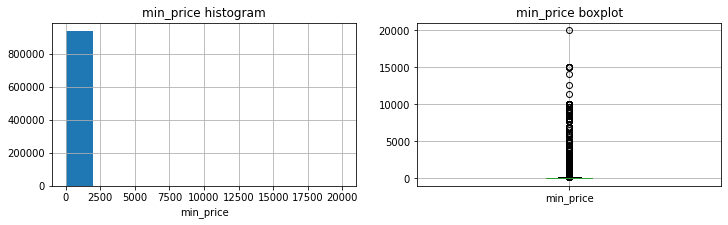

In [64]:
plot_distributions(df, 'min_price')

We can see that our distribution for the price has many outliers. We must recall that this defines the price for one night. Definitely, 20000 seems unreasonable. Nonetheless, I validated on AirBnB if there were this kind of accommodations available. If you visit the platform and filter for these prices, you will see very ordinary listings that are definitely worth that money. This could be a strategy for hosts to hide their place without removing it from the platform.

I decided to determine that all accommodations above $600 are outliers. This decision was based on some existing listings with this price for luxury apartments or even yatchs.

In [65]:
df = df[df['min_price']<600]

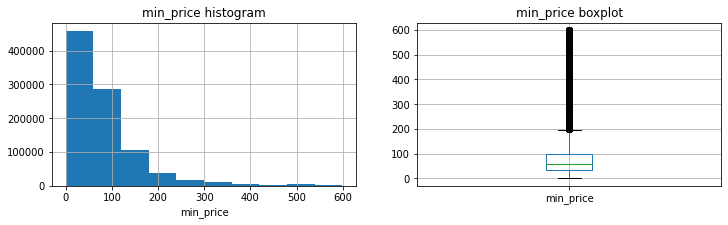

In [66]:
plot_distributions(df, 'min_price')

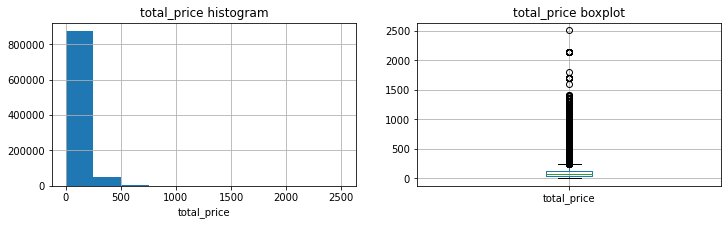

In [67]:
plot_distributions(df, 'total_price')

Now, the distribution seems much more reasonable although outliers are still present in the data. I don't delete them because we would like our model to be able to generalize for luxury listings.

In [68]:
# New shape
df.shape

(931124, 62)

Previous length: 944531 

#### Other variables

In [69]:
df.describe()

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
count,9.311240e+05,931124.000000,931124.000000,888971.000000,928986.000000,926834.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,883913.000000,883913.00000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,883913.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000,931124.000000
mean,1.633448e+07,0.127058,3.315171,1.292557,1.524883,2.204482,83.529299,131.450221,26.646254,1.814535,8.155636,0.121895,0.791520,0.427175,1.500636,98.756364,0.538786,0.00238,0.005400,0.000121,0.084806,0.596189,0.900902,0.460727,0.019695,0.742322,0.541691,0.887646,0.023034,0.268311,0.032529,0.690258,0.765066,0.588108,0.228902,0.332207,0.091469,0.032420,0.021497,0.012863,0.017017,0.107615,0.116998,0.039012,0.469804,0.005914,0.514634,0.009647,0.845522,0.015032,0.002168,0.017461,0.023308,0.020793,0.039219,0.018781,0.017715
std,1.161374e+07,0.333038,2.173596,0.602178,0.959254,1.838338,76.250961,283.986717,35.772065,1.487675,12.848772,0.327164,0.406222,0.494668,1.661495,92.964266,0.498494,0.04873,0.073285,0.011002,0.278593,0.490661,0.298794,0.498456,0.138951,0.437356,0.498259,0.315801,0.150011,0.443081,0.177401,0.462387,0.423958,0.492176,0.420126,0.471005,0.288275,0.177113,0.145033,0.112683,0.129335,0.309894,0.321419,0.193624,0.499088,0.076677,0.499786,0.097747,0.361406,0.121682,0.046515,0.130980,0.150881,0.142691,0.194116,0.135749,0.131914
min,5.808000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.279938e+06,0.000000,2.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.535353e+07,0.000000,2.000000,1.000000,1.000000,2.000000,60.000000,0.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,69.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.00

We see that there are some listings that have 0 bathrooms, bedrooms, beds and price. Let's analyze them.

In [70]:
df[df['Private room in apartment']>0]

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
90070,21974,0,2,NaN,1.0,1.0,80.0,0.0,0.0,2.0,0.0,0,1,1,2010,01,24,2020,08,0.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
90072,25786,1,2,NaN,1.0,1.0,41.0,0.0,0.0,2.0,0.0,0,1,0,2010,04,14,2020,08,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
90074,34241,0,2,NaN,1.0,1.0,70.0,0.0,0.0,2.0,0.0,0,1,1,2010,01,24,2020,08,0.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
90076,35318,0,2,NaN,1.0,2.0,69.0,0.0,0.0,2.0,0.0,0,1,0,2010,06,25,2020,08,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
90077,35379,1,2,NaN,1.0,1.0,16.0,0.0,0.0,2.0,0.0,0,1,1,2010,06,25,2020,08,0.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219896,45362701,1,4,NaN,NaN,2.0,30.0,0.0,0.0,4.0,0.0,0,1,1,2017,09,25,2020,09,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
219897,45363928,0,2,NaN,1.0,1.0,37.0,0.0,0.0,2.0,0.0,0,1,1,2020,09,05,2020,09,0.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
219898,45366153,0,2,NaN,1.0,NaN,98.0,0.0,0.0,2.0,0.0,0,1,1,2020,09,09,2020,09,0.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
219901,45373714,1,2,NaN,1.0,NaN,9.6,0.0,0.0,2.0,0.0,0,1,1,2019,12,07,2020,09,0.0,9.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


We see that private rooms in apartments doesn't have a bathroom. For these cases, I will inplace a 0 in the null values.

In [71]:
df[df['bathrooms']==0].head(20)

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
333,1565877,0,2,0.0,1.0,2.0,90.0,0.0,0.0,1.0,0.0,0,1,0,2012,08,26,2015,09,1.0,90.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
441,259852,0,2,0.0,1.0,1.0,45.0,100.0,15.0,1.0,8.0,0,1,0,2011,11,02,2015,09,1.0,53.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
445,259742,0,2,0.0,1.0,1.0,40.0,100.0,10.0,1.0,8.0,0,1,0,2011,11,02,2015,09,1.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
457,3699971,0,1,0.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,0,1,0,2014,07,25,2015,09,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
564,72794,0,4,0.0,2.0,4.0,85.0,150.0,40.0,2.0,20.0,0,1,0,2011,01,30,2015,09,2.0,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
636,2078598,0,3,0.0,1.0,2.0,30.0,0.0,20.0,2.0,15.0,0,1,0,2013,12,12,2015,09,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
900,270564,0,1,0.0,1.0,1.0,35.0,100.0,10.0,1.0,0.0,0,1,0,2011,11,02,2015,09,0.0,35.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1199,6695930,0,2,0.0,1.0,1.0,40.0,0.0,0.0,1.0,10.0,0,1,0,2015,06,05,2015,09,1.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1203,2079651,0,3,0.0,1.0,2.0,60.0,0.0,20.0,2.0,15.0,0,1,0,2013,12,12,2015,09,1.0,75.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2082,3697205,0,1,0.0,1.0,1.0,30.0,100.0,15.0,0.0,0.0,0,1,0,2011,07,22,2015,09,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [72]:
df[(df['bathrooms']==0) & (df['Apartment']==1)]

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,host_since_year,host_since_month,host_since_day,date_year,date_month,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
441,259852,0,2,0.0,1.0,1.0,45.0,100.0,15.0,1.0,8.0,0,1,0,2011,11,02,2015,09,1.0,53.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
445,259742,0,2,0.0,1.0,1.0,40.0,100.0,10.0,1.0,8.0,0,1,0,2011,11,02,2015,09,1.0,48.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
457,3699971,0,1,0.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,0,1,0,2014,07,25,2015,09,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
564,72794,0,4,0.0,2.0,4.0,85.0,150.0,40.0,2.0,20.0,0,1,0,2011,01,30,2015,09,2.0,125.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
636,2078598,0,3,0.0,1.0,2.0,30.0,0.0,20.0,2.0,15.0,0,1,0,2013,12,12,2015,09,1.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942041,6949612,0,2,0.0,1.0,1.0,30.0,100.0,0.0,1.0,0.0,1,1,0,2015,06,10,2018,04,1.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
942245,6987451,0,1,0.0,1.0,1.0,25.0,390.0,10.0,1.0,0.0,1,1,0,2015,06,10,2018,04,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
942331,6987905,0,1,0.0,1.0,1.0,23.0,350.0,10.0,1.0,0.0,1,1,0,2015,06,10,2018,04,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
943924,7713454,1,1,0.0,1.0,1.0,45.0,0.0,7.0,1.0,0.0,0,1,0,2015,08,04,2018,04,0.0,45.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


However, those having bathroom 0 seem to be corrupted entries except for the ones in Hotels, Bed&Breakfast and other property types that share a bathroom. Therefore, we will drop apartments with 0 bathrooms.

In [73]:
df = df.drop(df[(df['bathrooms']==0) & (df['Apartment']==1)].index)
df['bathrooms'] = df['bathrooms'].fillna(0)

On the other hand, listings with 0 bedrooms, beds or price will not be considered.

In [74]:
df = df[df['bedrooms']>0]
df = df[df['beds']>0]
df = df[df['min_price']>0]

In [75]:
df.shape

(889062, 62)

In [76]:
df.describe()

,id,host_is_superhost,accommodates,bathrooms,bedrooms,beds,min_price,security_deposit,cleaning_fee,min_guests,extra_people,minimum_nights,maximum_nights,license,extra_guests,total_price,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Boat,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
count,8.890620e+05,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,844734.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000,889062.000000
mean,1.609472e+07,0.128609,3.354515,1.246268,1.575305,2.247775,84.040726,131.988177,26.907492,1.830772,8.279788,0.119153,0.790132,0.424243,1.523743,99.627100,0.536826,0.002410,0.005427,0.000127,0.085756,0.601194,0.901653,0.467818,0.020102,0.744542,0.547339,0.888057,0.023133,0.269395,0.032555,0.691989,0.768387,0.585816,0.222988,0.336014,0.091633,0.032461,0.021471,0.012707,0.017040,0.108518,0.117934,0.039235,0.465203,0.006010,0.518865,0.009923,0.851371,0.015443,0.002235,0.017478,0.023329,0.015775,0.038618,0.017705,0.018045
std,1.146667e+07,0.334766,2.193690,0.645654,0.935687,1.853737,76.838855,285.032216,36.070880,1.506725,12.884156,0.323968,0.407215,0.494228,1.676270,93.774319,0.498642,0.049035,0.073465,0.011254,0.280004,0.489653,0.297783,0.498964,0.140350,0.436119,0.497754,0.315296,0.150325,0.443646,0.177468,0.461671,0.421863,0.492581,0.416250,0.472344,0.288507,0.177222,0.144948,0.112005,0.129422,0.311033,0.322531,0.194153,0.498788,0.077289,0.499644,0.099118,0.355722,0.123308,0.047222,0.131044,0.150947,0.124604,0.192683,0.131878,0.133114
min,1.093800e+04,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.151840e+06,0.000000,2.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.505000e+07,0.000000,2.000000,1.000000,1.000000,2.000000,60.000000,0.000000,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,69.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000

In [77]:
for a in amenities_set:
    print("{} listings have {}".format(len(df[df[a]==1.]), a))

494859 listings have wifi
584547 listings have tv
453475 listings have air conditioning
761657 listings have essentials
19541 listings have pool
649083 listings have washer
107 listings have beach view
227567 listings have smoking allowed
750172 listings have kitchen
2036 listings have balcony
395182 listings have family/kid friendly
462356 listings have internet
628940 listings have heating
16981 listings have garden
27500 listings have suitable for events
4584 listings have bath towel
72441 listings have breakfast
507849 listings have elevator


In [78]:
for p in set(apartment_map.values()):
    print("{} listings are of type {}".format(len(df[df[p]==1.]), p))

16043 listings are of type Serviced apartment
20741 listings are of type House
15539 listings are of type Condominium
14025 listings are of type Loft
756922 listings are of type Apartment
34334 listings are of type Other
1987 listings are of type Boat
15741 listings are of type Private room in apartment
13730 listings are of type B&B


In [79]:
df.columns

Index(['id', 'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'min_price', 'security_deposit', 'cleaning_fee', 'min_guests',
       'extra_people', 'minimum_nights', 'maximum_nights', 'license',
       'host_since_year', 'host_since_month', 'host_since_day', 'date_year',
       'date_month', 'extra_guests', 'total_price', 'air conditioning',
       'balcony', 'bath towel', 'beach view', 'breakfast', 'elevator',
       'essentials', 'family/kid friendly', 'garden', 'heating', 'internet',
       'kitchen', 'pool', 'smoking allowed', 'suitable for events', 'tv',
       'washer', 'wifi', 'Ciutat Vella', 'Eixample', 'Gràcia',
       'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu',
       'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Entire home/apt', 'Hotel room', 'Private room in shared building',
       'Shared room', 'Apartment', 'B&B', 'Boat', 'Condominium', 'House',
       'Loft', 'Other', 'Private room in apartment', 'Serviced ap

-----
# Training a model

We would like to help new hosts set the price of their apartments. We will explore different models, compare them and fine-tune our variables to increase its accuracy.

In [80]:
df.columns

Index(['id', 'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'min_price', 'security_deposit', 'cleaning_fee', 'min_guests',
       'extra_people', 'minimum_nights', 'maximum_nights', 'license',
       'host_since_year', 'host_since_month', 'host_since_day', 'date_year',
       'date_month', 'extra_guests', 'total_price', 'air conditioning',
       'balcony', 'bath towel', 'beach view', 'breakfast', 'elevator',
       'essentials', 'family/kid friendly', 'garden', 'heating', 'internet',
       'kitchen', 'pool', 'smoking allowed', 'suitable for events', 'tv',
       'washer', 'wifi', 'Ciutat Vella', 'Eixample', 'Gràcia',
       'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu',
       'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi',
       'Entire home/apt', 'Hotel room', 'Private room in shared building',
       'Shared room', 'Apartment', 'B&B', 'Boat', 'Condominium', 'House',
       'Loft', 'Other', 'Private room in apartment', 'Serviced ap

#### Training columns
Only these columns will be used during training

In [81]:
train_columns = ['host_is_superhost', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'min_guests', 'minimum_nights', 'maximum_nights',
       'license', 'date_year', 'date_month', 'air conditioning', 'balcony', 'bath towel',
       'beach view', 'breakfast', 'elevator', 'essentials',
       'family/kid friendly', 'garden', 'heating', 'internet', 'kitchen',
       'pool', 'smoking allowed', 'suitable for events', 'tv', 'washer',
       'wifi', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Entire home/apt',
       'Hotel room', 'Private room in shared building', 'Shared room',
       'Apartment', 'B&B', 'Condominium', 'House', 'Loft', 'Other',
       'Private room in apartment', 'Serviced apartment']

objective_columns = ['min_price', 'total_price', 'extra_people']

#### Dealing with duplicates
Since we have monthly information, most listings will appear several times with similar prices. We need to delete these to avoid overfitting. We will keep the last information we have for each apartment.

In [82]:
# We must delete the same listing several times to avoid overfitting
df_train = df.sort_values(by='date_year', ascending=False).drop_duplicates(subset=['id'])
df_train = df_train[train_columns+objective_columns]

In [83]:
df_train.date_year.value_counts()

2020    25853
2018    16509
2017    14293
2019    12587
2015     7873
2016     6661
Name: date_year, dtype: int64

In [84]:
df.shape

(889062, 62)

In [85]:
# Our training set has finally this shape
df_train.shape

(83776, 56)

#### Dealing with null values
We only find null values in the amenities columns. This are coming from the way we built the dataframe. Rows with no amenities were filled with null values. We will fill this values with 0.

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83776 entries, 141631 to 127400
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   host_is_superhost                83776 non-null  int64  
 1   accommodates                     83776 non-null  int64  
 2   bathrooms                        83776 non-null  float64
 3   bedrooms                         83776 non-null  float64
 4   beds                             83776 non-null  float64
 5   security_deposit                 83776 non-null  float64
 6   cleaning_fee                     83776 non-null  float64
 7   min_guests                       83776 non-null  float64
 8   minimum_nights                   83776 non-null  int64  
 9   maximum_nights                   83776 non-null  int64  
 10  license                          83776 non-null  int64  
 11  date_year                        83776 non-null  object 
 12  date_month  

In [87]:
df_train = df_train.fillna(0)

In [88]:
# Checkpoint
#df_train.to_csv('df_train.csv')
# df_train = pd.read_csv('df_train.csv', index_col=0)

# Predicting min price
We must now split our features and objective variables for training and create training and test sets.

In [89]:
X = df_train[train_columns]

In [90]:
y = df_train['min_price']

In [91]:
def split_train_dataset(X, y, test_size):
    return train_test_split(X, y, test_size=test_size)

In [92]:
X_train, X_test, y_train, y_test = split_train_dataset(X.values, y.values, test_size=0.2)

#### Functions used to evaluate the models

In [93]:
from sklearn.metrics import r2_score, mean_squared_error
def evaluate_regression(y_true, y_pred):
    print("R2 score for test set: {}".format(r2_score(y_true, y_pred)))
    print("MSE score for test set: {}".format(mean_squared_error(y_true, y_pred)))

In [94]:
import seaborn as sns
def plot_regresion(X_test, y_test, y_pred):
    plot_df = pd.DataFrame()
    plot_df['y_true'] = y_test
    plot_df['y_pred'] = y_pred
    sns.lmplot(x='y_true',y='y_pred', data=plot_df, fit_reg=True)

### Base model: Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [97]:
y_pred = linreg.predict(X_test)

In [98]:
evaluate_regression(y_test, y_pred)

R2 score for test set: 0.42448447526638877
MSE score for test set: 3145.103835862317


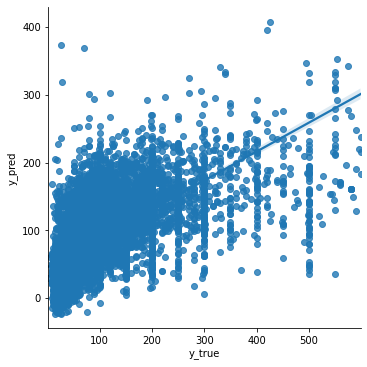

In [99]:
plot_regresion(X_test, y_test, y_pred)

#### First conclusions

It seems that the baseline linear model is not fitting the data but not very accurately. Therefore, new transformations will be considered and also more powerful models for regression.

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [102]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [103]:
rf_pred = rf.predict(X_test)

In [104]:
evaluate_regression(y_test, rf_pred)

R2 score for test set: 0.5951198353489635
MSE score for test set: 2212.6078345114233


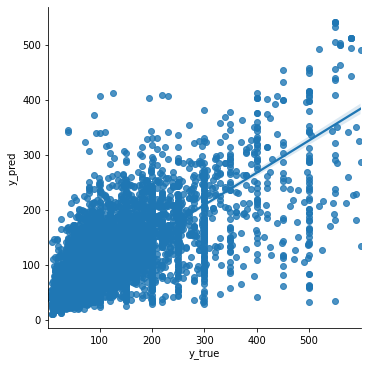

In [105]:
plot_regresion(X_test, y_test, rf_pred)

# Data Transformation
We will try to transform slightly our data to increase the accuracy of the model. We will consider standardization for numerical variables. Also, months will be one hot encoded and years dropped to ensure generalization.

In [106]:
X.reset_index(drop=True, inplace=True)

In [107]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to be standardized
numerical_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'min_guests', 'security_deposit', 'cleaning_fee']

In [108]:
numerical_columns

['accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'min_guests',
 'security_deposit',
 'cleaning_fee']

In [109]:
scaler = StandardScaler().fit(X[numerical_columns].values)

In [110]:
scaled_features = scaler.transform(X[numerical_columns].values)

In [111]:
X_trans = pd.DataFrame(scaled_features, columns=numerical_columns)

In [112]:
X_trans = X_trans.join(X[[col for col in X.columns if col not in numerical_columns]])

In [113]:
X_trans.head()

,accommodates,bathrooms,bedrooms,beds,min_guests,security_deposit,cleaning_fee,host_is_superhost,minimum_nights,maximum_nights,license,date_year,date_month,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment
0,-1.061211,0.458279,-0.569859,-0.634052,-0.472302,-0.414284,-0.701837,1,1,1,0,2020,01,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,-1.061211,-0.385221,-0.569859,-0.634052,-0.472302,-0.414284,-0.401734,0,0,1,0,2020,01,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,-0.086055,1.301779,-0.569859,-0.044287,-0.472302,-0.414284,-0.701837,0,0,1,0,2020,01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,-0.573633,-0.385221,-0.569859,-0.634052,-0.472302,-0.042564,-0.251683,1,0,1,0,2020,01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,0.401523,1.301779,0.587375,0.545477,0.302454,0.700874,2.149136,0,0,1,1,2020,01,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [114]:
# One hot encode dates
X_trans = X_trans.drop(columns=['date_year'])
X_trans = one_hot_encode(X_trans, 'date_month')

In [115]:
X_trans.head()

,accommodates,bathrooms,bedrooms,beds,min_guests,security_deposit,cleaning_fee,host_is_superhost,minimum_nights,maximum_nights,license,air conditioning,balcony,bath towel,beach view,breakfast,elevator,essentials,family/kid friendly,garden,heating,internet,kitchen,pool,smoking allowed,suitable for events,tv,washer,wifi,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi,Entire home/apt,Hotel room,Private room in shared building,Shared room,Apartment,B&B,Condominium,House,Loft,Other,Private room in apartment,Serviced apartment,01,02,03,04,05,06,07,08,09,10,11,12
0,-1.061211,0.458279,-0.569859,-0.634052,-0.472302,-0.414284,-0.701837,1,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,-1.061211,-0.385221,-0.569859,-0.634052,-0.472302,-0.414284,-0.401734,0,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,-0.086055,1.301779,-0.569859,-0.044287,-0.472302,-0.414284,-0.701837,0,0,1,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,-0.573633,-0.385221,-0.569859,-0.634052,-0.472302,-0.042564,-0.251683,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.401523,1.301779,0.587375,0.545477,0.302454,0.700874,2.149136,0,0,1,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [116]:
# Checkpoint
#X_trans.join(y.reset_index(drop=True)).to_csv('df_tuned.csv')

### Generate new training data

In [117]:
X_train, X_test, y_train, y_test = split_train_dataset(X_trans.values, y.values, test_size=0.2)

# Linear Regression - revisited

In [118]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [119]:
y_pred = linreg.predict(X_test)

In [120]:
evaluate_regression(y_test, y_pred)

R2 score for test set: 0.4286256649385076
MSE score for test set: 3066.507788450275


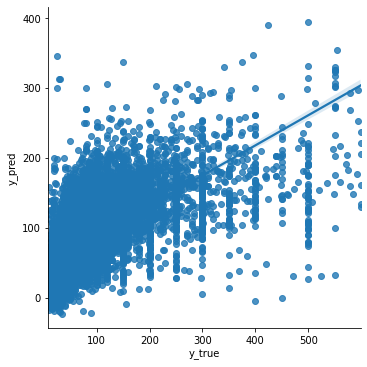

In [121]:
plot_regresion(X_test, y_test, y_pred)

# Random Forest - revisited

In [122]:
rf = RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [123]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [124]:
rf_pred = rf.predict(X_test)

In [125]:
evaluate_regression(y_test, rf_pred)

R2 score for test set: 0.5933454313515583
MSE score for test set: 2182.4735999651234


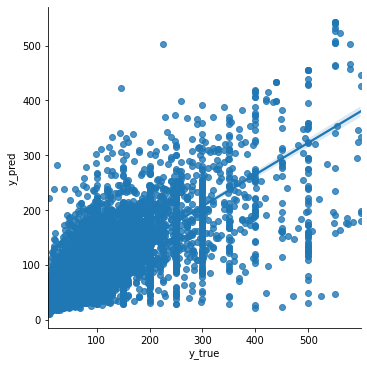

In [126]:
plot_regresion(X_test, y_test, rf_pred)

# Random Forest - finetuned

In [127]:
rf2 = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=120)

In [128]:
rf2.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=120)

In [129]:
rf2_pred = rf2.predict(X_test)

In [130]:
evaluate_regression(y_test, rf2_pred)

R2 score for test set: 0.6044286602321987
MSE score for test set: 2122.9910408123687


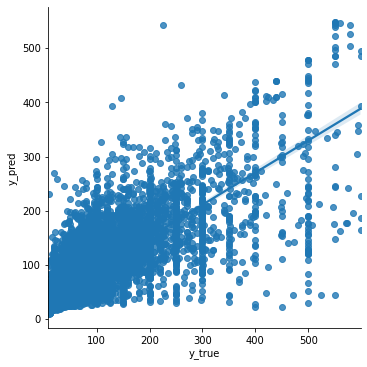

In [131]:
plot_regresion(X_test, y_test, rf2_pred)

# XGBoost

In [132]:
import xgboost

In [133]:
xgb = xgboost.XGBRegressor(learning_rate=0.1,
                 max_depth=15,
                 n_estimators=80)

In [134]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
xgb_pred = xgb.predict(X_test)

In [136]:
evaluate_regression(y_test, xgb_pred)

R2 score for test set: 0.5882693517307629
MSE score for test set: 2209.716401639593


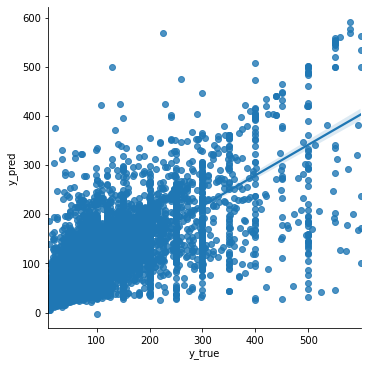

In [137]:
plot_regresion(X_test, y_test, xgb_pred)

### Conclusions
I will be choosing the random forest since it is the model with highest R2 score and lowest MSE.

In [138]:
import pickle

with open('min_model.h5', 'wb') as f:
    pickle.dump(rf2, f)
    
with open('scaler.h5', 'wb') as f:
    pickle.dump(scaler, f)

## Explaining the model

In [139]:
import numpy as np
import shap

In [140]:
explainer = shap.TreeExplainer(rf2)

In [141]:
shap_values = explainer.shap_values(X_train[:200])

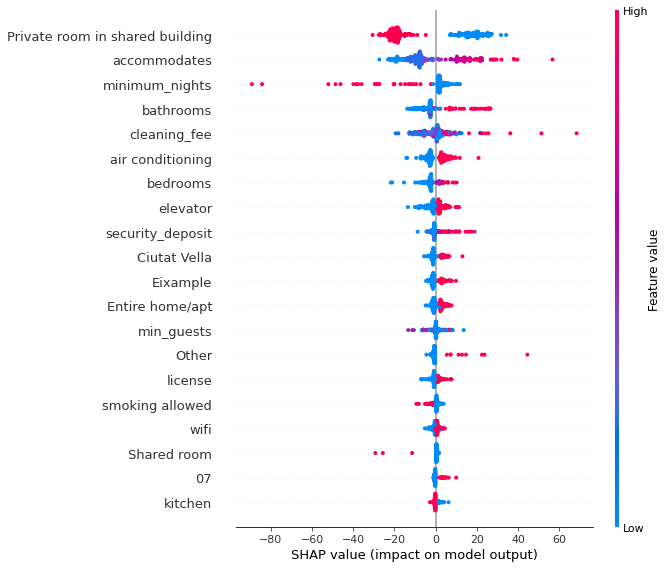

In [142]:
shap.initjs()
shap.summary_plot(shap_values, X_train[:200], feature_names=X_trans.columns)

# Predicting total price

Now, we will try to predict the additional price for the accommodations that want to charge extra price for aditional guests.

In [143]:
y = df_train['total_price']

In [144]:
def split_train_dataset(X, y, test_size):
    return train_test_split(X, y, test_size=test_size)

In [145]:
X_train, X_test, y_train, y_test = split_train_dataset(X_trans.values, y.values, test_size=0.2)

## Linear Regression

In [146]:
linreg_total = LinearRegression()
linreg_total.fit(X_train, y_train)

LinearRegression()

In [147]:
y_pred = linreg_total.predict(X_test)

In [148]:
evaluate_regression(y_test, y_pred)

R2 score for test set: 0.5268601440544892
MSE score for test set: 3780.0841685037376


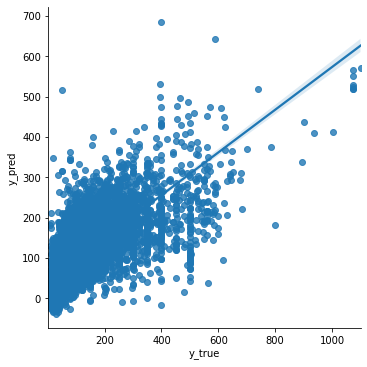

In [149]:
plot_regresion(X_test, y_test, y_pred)

# Random Forest

In [150]:
rf_total = RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [151]:
rf_total.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [152]:
rf_total_pred = rf_total.predict(X_test)

In [153]:
evaluate_regression(y_test, rf_total_pred)

R2 score for test set: 0.6673353396578764
MSE score for test set: 2657.7773995956804


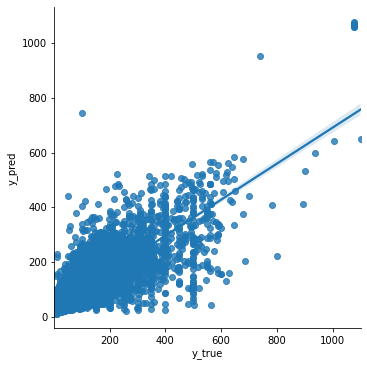

In [154]:
plot_regresion(X_test, y_test, rf_total_pred)

# Random Forest - finetuned

In [155]:
rf2_total = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=6, n_estimators=120)

In [156]:
rf2_total.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=6,
                      n_estimators=120)

In [157]:
rf2_total_pred = rf2_total.predict(X_test)

In [158]:
evaluate_regression(y_test, rf2_total_pred)

R2 score for test set: 0.6770662120341577
MSE score for test set: 2580.033966754234


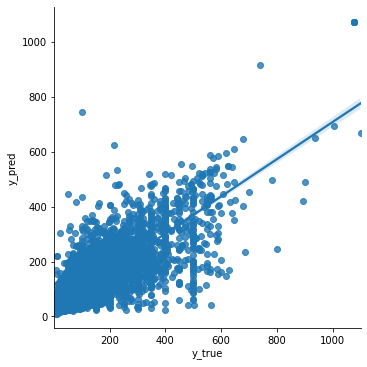

In [159]:
plot_regresion(X_test, y_test, rf2_total_pred)

# XGBoost

In [160]:
import xgboost

In [161]:
xgb_total = xgboost.XGBRegressor(learning_rate=0.1,
                 max_depth=15,
                 n_estimators=80)

In [162]:
xgb_total.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=80, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [163]:
xgb_total_pred = xgb_total.predict(X_test)

In [164]:
evaluate_regression(y_test, xgb_total_pred)

R2 score for test set: 0.6708743645665064
MSE score for test set: 2629.5028590746356


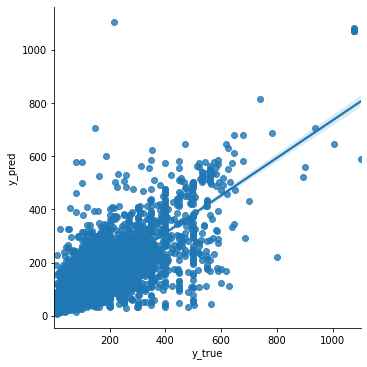

In [165]:
plot_regresion(X_test, y_test, xgb_total_pred)

In [166]:
import pickle

with open('total_model.h5', 'wb') as f:
    pickle.dump(rf2_total, f)

## Explaining the model

In [167]:
explainer_total = shap.TreeExplainer(rf2_total)

In [168]:
shap_values_total = explainer_total.shap_values(X_train[:200])

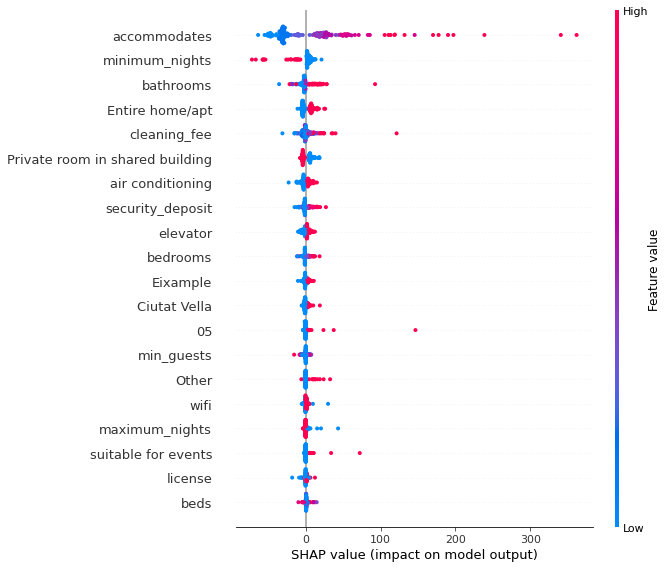

In [169]:
shap.initjs()
shap.summary_plot(shap_values_total, X_train[:200], feature_names=X_trans.columns)